## Setup Environment

In [2]:
# Set Imports
import pandas as pd
from pandas_datareader import data, wb
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_colwidth', 200)

## Data Exploration (Small Sample Size)

In [3]:
# Gather data from SPY ETF: this instument represents the stocks of the S&P 500
import pandas_datareader as pdr

start_date = pd.to_datetime('2010-01-01')
stop_date = pd.to_datetime('2016-03-01')

spy = pdr.data.get_data_yahoo('SPY', start_date, stop_date)

display(spy)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600,113.330002
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900,113.629997
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400,113.709999
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100,114.190002
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800,114.570000
...,...,...,...,...,...,...
2016-02-24,193.529999,189.320007,190.630005,193.199997,150812152,193.199997
2016-02-25,195.550003,192.830002,193.729996,195.539993,110728317,195.539993
2016-02-26,196.679993,194.899994,196.570007,195.089203,129833663,195.089203


Text(0.5, 1.0, 'SPY')

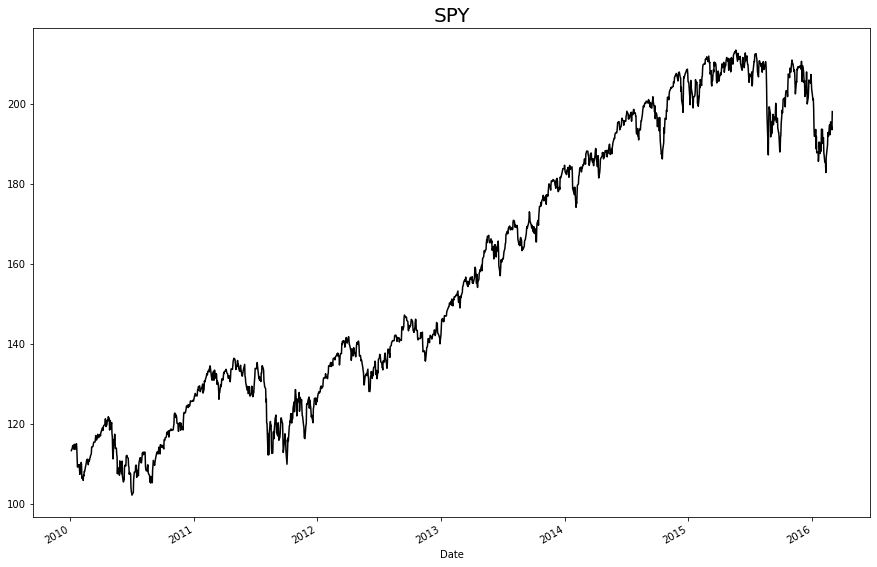

In [4]:
# Plot data
spy_c = spy['Close']

fig, ax = plt.subplots(figsize=(15,10))
spy_c.plot(color='k')
plt.title("SPY", fontsize=20)

In [5]:
# Pull data for data analysis purposes
first_open = spy['Open'].iloc[0]
print("First Open: " + str(first_open))

last_close = spy['Close'].iloc[-1]
print("Last Close: " + str(last_close))

print("Delta over period of time: " + str(last_close - first_open))

First Open: 112.37000274658203
Last Close: 198.11000061035156
Delta over period of time: 85.73999786376953


In [6]:
# Analyze intraday deltas
import numpy as np

spy['Daily Change'] = pd.Series(spy['Close'] - spy['Open'])
print(spy['Daily Change'])

daily_change_sum = spy['Daily Change'].sum()
daily_change_std_dev = np.std(spy['Daily Change'])

print("\n" + "Sum of Daily Change: " + str(daily_change_sum))
print("Standard Deviation of Daily Change: " + str(daily_change_std_dev))

Date
2010-01-04    0.959999
2010-01-05    0.369995
2010-01-06    0.190002
2010-01-07    0.690002
2010-01-08    0.680000
                ...   
2016-02-24    2.569992
2016-02-25    1.809998
2016-02-26   -1.480804
2016-02-29   -1.550003
2016-03-01    3.100006
Name: Daily Change, Length: 1550, dtype: float64

Sum of Daily Change: 40.293968200683594
Standard Deviation of Daily Change: 1.1454417328273667


In [7]:
# Analyze overnight deltas
spy['Overnight Change'] = pd.Series(spy['Open'] - spy['Close'].shift(1))
print(spy['Overnight Change'])

overnight_sum = spy['Overnight Change'].sum()
overnight_std_dev = np.std(spy['Overnight Change'])

print("\n" + "Sum of Overnight Change: " + str(overnight_sum))
print("Standard Deviation of Overnight Change: " + str(overnight_std_dev))

Date
2010-01-04         NaN
2010-01-05   -0.070000
2010-01-06   -0.110001
2010-01-07   -0.209999
2010-01-08   -0.300003
                ...   
2016-02-24   -1.690002
2016-02-25    0.529999
2016-02-26    1.030014
2016-02-29    0.020798
2016-03-01    1.449997
Name: Overnight Change, Length: 1550, dtype: float64

Sum of Overnight Change: 45.44602966308594
Standard Deviation of Overnight Change: 0.9518729315831574


In [8]:
# Compare the average change on downside days vs upside days
daily_upside_change = spy[spy['Daily Change'] > 0]['Daily Change'].mean()
overnight_upside_change = spy[spy['Overnight Change'] > 0]['Overnight Change'].mean()

daily_downside_change = spy[spy['Daily Change'] < 0]['Daily Change'].mean()
overnight_downside_change = spy[spy['Overnight Change'] < 0]['Overnight Change'].mean()

print("Average Daily Upside Change: " + str(daily_upside_change))
print("Average Overnight Upside Change: " + str(overnight_upside_change))
print("\nAverage Daily Downside Change: " + str(daily_downside_change))
print("Average Overnight Downside Change: " + str(overnight_downside_change))

Average Daily Upside Change: 0.7818367909880839
Average Overnight Upside Change: 0.6346182933265065

Average Daily Downside Change: -0.9058683201886606
Average Overnight Downside Change: -0.6641292837668926


In [9]:
# Calculate returns
## Daily returns
daily_rtn = ((spy['Close'] - spy['Close'].shift(1)) / spy['Close'].shift(1)) * 100

## Intraday returns
id_rtn = ((spy['Close'] - spy['Open']) / spy['Open']) * 100

## Overnight returns
on_rtn = ((spy['Open'] - spy['Close'].shift(1)) / spy['Close'].shift(1)) * 100

print(daily_rtn)

Date
2010-01-04         NaN
2010-01-05    0.264710
2010-01-06    0.070406
2010-01-07    0.422129
2010-01-08    0.332776
                ...   
2016-02-24    0.457565
2016-02-25    1.211178
2016-02-26   -0.230536
2016-02-29   -0.783849
2016-03-01    2.350694
Name: Close, Length: 1550, dtype: float64


In [10]:
# Create function to analyze Sharpe Ratio for all strategies
def get_stats(s, n=252):
    s = s.dropna()
    wins = len(s[s>0])
    losses = len(s[s<0])
    evens = len(s[s==0])
    mean_w = round(s[s>0].mean(), 3)
    mean_l = round(s[s<0].mean(), 3)
    win_r = round(wins/losses, 3)
    mean_trd = round(s.mean(), 3)
    sd = round(np.std(s), 3)
    max_w = round(s.max(), 3)
    max_l = round(s.min(), 3)
    sharpe_r = round((s.mean()/np.std(s)) * np.sqrt(n), 4)
    cnt = len(s)
    print("Trades: ", cnt, \
          "\nWins: ", wins, \
          "\nLosses: ", losses, \
          "\nBreakeven: ", evens, \
          "\nWin/Loss Ratio: ", win_r, \
          "\nMean Win: ", mean_w, \
          "\nMean Loss: ", mean_l, \
          "\nMean: ", mean_trd, \
          "\nStd Dev: ", sd, \
          "\nMax Win: ", max_w, \
          "\nMax Loss: ", max_l, \
          "\nSharpe Ratio: ", sharpe_r
    )

In [11]:
# Get stats for Daily Returns
get_stats(daily_rtn)

Trades:  1549 
Wins:  847 
Losses:  699 
Breakeven:  3 
Win/Loss Ratio:  1.212 
Mean Win:  0.688 
Mean Loss:  -0.742 
Mean:  0.041 
Std Dev:  1.007 
Max Win:  4.65 
Max Loss:  -6.512 
Sharpe Ratio:  0.6485


In [12]:
# Get stats for Intraday Returns
get_stats(id_rtn)

Trades:  1550 
Wins:  851 
Losses:  690 
Breakeven:  9 
Win/Loss Ratio:  1.233 
Mean Win:  0.515 
Mean Loss:  -0.59 
Mean:  0.02 
Std Dev:  0.757 
Max Win:  3.683 
Max Loss:  -4.175 
Sharpe Ratio:  0.4162


In [13]:
# Get stats for Overnight Returns
get_stats(on_rtn)

Trades:  1549 
Wins:  823 
Losses:  718 
Breakeven:  8 
Win/Loss Ratio:  1.146 
Mean Win:  0.421 
Mean Loss:  -0.436 
Mean:  0.022 
Std Dev:  0.629 
Max Win:  4.09 
Max Loss:  -5.131 
Sharpe Ratio:  0.5453


## Gather Model Data (Extended Sample Size)

In [14]:
# Extending the anlaysis period
start_date = pd.to_datetime('2000-01-01')
stop_date = pd.to_datetime('2016-03-01')

sp = pdr.data.get_data_yahoo('SPY', start_date, stop_date)

Text(0.5, 1.0, 'SPY')

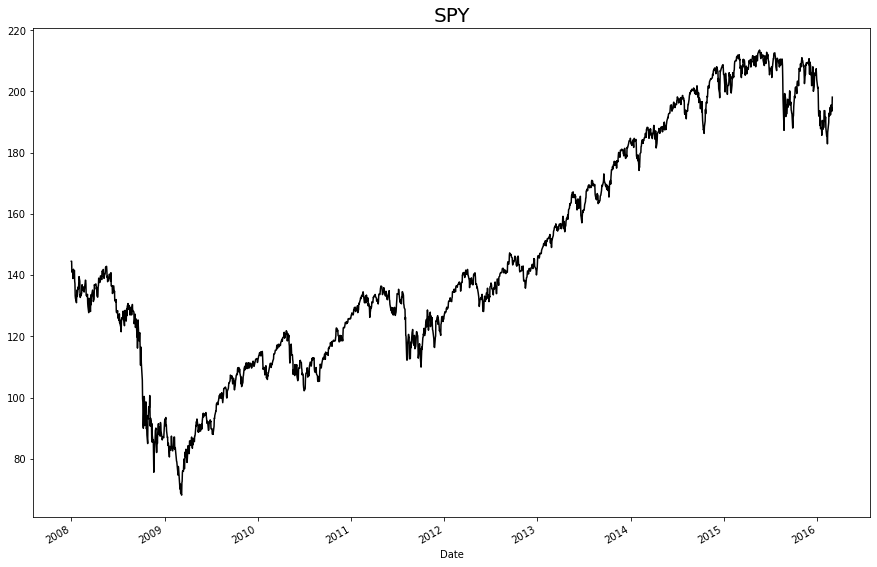

In [15]:
# Plot extended data
fig, ax = plt.subplots(figsize=(15,10))
sp['Close'].plot(color='k')
plt.title("SPY", fontsize=20)

In [16]:
# Calculate longer period returns
long_day_rtn = ((sp['Close'] - sp['Close'].shift(1)) / sp['Close'].shift(1)) * 100
long_id_rtn = ((sp['Close'] - sp['Open']) / sp['Open']) * 100
long_on_rtn = ((sp['Open'] - sp['Close'].shift(1)) / sp['Close'].shift(1)) * 100

In [17]:
# Calculate point totals for each strategy
## Close to Close (Daily)
c_to_c = (sp['Close'] - sp['Close'].shift(1)).sum()

## Open to Close (Intraday)
o_to_c = (sp['Close'] - sp['Open']).sum()

## Close to Open (Overnight)
c_to_o = (sp['Open'] - sp['Close']).sum()

print("Close to Close: ", c_to_c, \
      "\nOpen to Close: ", o_to_c, \
      "\nClose to Open:", c_to_o
)

Close to Close:  53.60099792480469 
Open to Close:  53.73396301269531 
Close to Open: -53.73396301269531


In [18]:
# Get stats for Long Daily Retuns
get_stats(long_day_rtn)

Trades:  2054 
Wins:  1113 
Losses:  938 
Breakeven:  3 
Win/Loss Ratio:  1.187 
Mean Win:  0.851 
Mean Loss:  -0.955 
Mean:  0.025 
Std Dev:  1.388 
Max Win:  11.56 
Max Loss:  -9.012 
Sharpe Ratio:  0.286


In [19]:
# Get stats for Long Intraday Retuns
get_stats(long_id_rtn)

Trades:  2055 
Wins:  990 
Losses:  800 
Breakeven:  265 
Win/Loss Ratio:  1.238 
Mean Win:  0.57 
Mean Loss:  -0.647 
Mean:  0.023 
Std Dev:  0.802 
Max Win:  4.42 
Max Loss:  -4.625 
Sharpe Ratio:  0.4519


In [20]:
# Get stats for Long Overnight Retuns
get_stats(long_on_rtn)

Trades:  2054 
Wins:  1090 
Losses:  956 
Breakeven:  8 
Win/Loss Ratio:  1.14 
Mean Win:  0.585 
Mean Loss:  -0.664 
Mean:  0.002 
Std Dev:  1.101 
Max Win:  11.56 
Max Loss:  -9.012 
Sharpe Ratio:  0.0263


## Build Model with Support Vector Regression

In [21]:
# Build df that contains price history for each date (past 20 closes) - predict from one day's close to the next
for i in range(1,21,1):
    sp.loc[:, 'Close Minus ' + str(i)] = sp['Close'].shift(i)

sp20 = sp[[x for x in sp.columns if 'Close Minus' in x or x == 'Close']].iloc[20:]
display(sp20)

,Close,Close Minus 1,Close Minus 2,Close Minus 3,Close Minus 4,Close Minus 5,Close Minus 6,Close Minus 7,Close Minus 8,Close Minus 9,...,Close Minus 11,Close Minus 12,Close Minus 13,Close Minus 14,Close Minus 15,Close Minus 16,Close Minus 17,Close Minus 18,Close Minus 19,Close Minus 20
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-31,137.806000,135.514008,136.153000,135.315002,132.981003,135.121002,133.774994,130.966003,132.427002,133.229004,...,137.966995,141.488998,139.968994,141.889999,140.768997,138.867996,141.416000,140.960007,144.507996,144.509003
2008-02-01,139.488007,137.806000,135.514008,136.153000,135.315002,132.981003,135.121002,133.774994,130.966003,132.427002,...,137.210999,137.966995,141.488998,139.968994,141.889999,140.768997,138.867996,141.416000,140.960007,144.507996
2008-02-04,138.033005,139.488007,137.806000,135.514008,136.153000,135.315002,132.981003,135.121002,133.774994,130.966003,...,133.229004,137.210999,137.966995,141.488998,139.968994,141.889999,140.768997,138.867996,141.416000,140.960007
2008-02-05,133.636993,138.033005,139.488007,137.806000,135.514008,136.153000,135.315002,132.981003,135.121002,133.774994,...,132.427002,133.229004,137.210999,137.966995,141.488998,139.968994,141.889999,140.768997,138.867996,141.416000
2008-02-06,132.673996,133.636993,138.033005,139.488007,137.806000,135.514008,136.153000,135.315002,132.981003,135.121002,...,130.966003,132.427002,133.229004,137.210999,137.966995,141.488998,139.968994,141.889999,140.768997,138.867996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-24,193.199997,192.320007,194.779999,192.000000,192.089996,192.880005,189.779999,186.630005,182.860001,185.270004,...,185.419998,187.949997,191.600006,191.300003,190.160004,193.649994,193.720795,189.110001,188.130005,190.199997
2016-02-25,195.539993,193.199997,192.320007,194.779999,192.000000,192.089996,192.880005,189.779999,186.630005,182.860001,...,185.429993,185.419998,187.949997,191.600006,191.300003,190.160004,193.649994,193.720795,189.110001,188.130005
2016-02-26,195.089203,195.539993,193.199997,192.320007,194.779999,192.000000,192.089996,192.880005,189.779999,186.630005,...,185.270004,185.429993,185.419998,187.949997,191.600006,191.300003,190.160004,193.649994,193.720795,189.110001


In [22]:
# Reverse columns to have time run left -> right
sp20 = sp20.iloc[:, ::-1]
display(sp20)

,Close Minus 20,Close Minus 19,Close Minus 18,Close Minus 17,Close Minus 16,Close Minus 15,Close Minus 14,Close Minus 13,Close Minus 12,Close Minus 11,...,Close Minus 9,Close Minus 8,Close Minus 7,Close Minus 6,Close Minus 5,Close Minus 4,Close Minus 3,Close Minus 2,Close Minus 1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-31,144.509003,144.507996,140.960007,141.416000,138.867996,140.768997,141.889999,139.968994,141.488998,137.966995,...,133.229004,132.427002,130.966003,133.774994,135.121002,132.981003,135.315002,136.153000,135.514008,137.806000
2008-02-01,144.507996,140.960007,141.416000,138.867996,140.768997,141.889999,139.968994,141.488998,137.966995,137.210999,...,132.427002,130.966003,133.774994,135.121002,132.981003,135.315002,136.153000,135.514008,137.806000,139.488007
2008-02-04,140.960007,141.416000,138.867996,140.768997,141.889999,139.968994,141.488998,137.966995,137.210999,133.229004,...,130.966003,133.774994,135.121002,132.981003,135.315002,136.153000,135.514008,137.806000,139.488007,138.033005
2008-02-05,141.416000,138.867996,140.768997,141.889999,139.968994,141.488998,137.966995,137.210999,133.229004,132.427002,...,133.774994,135.121002,132.981003,135.315002,136.153000,135.514008,137.806000,139.488007,138.033005,133.636993
2008-02-06,138.867996,140.768997,141.889999,139.968994,141.488998,137.966995,137.210999,133.229004,132.427002,130.966003,...,135.121002,132.981003,135.315002,136.153000,135.514008,137.806000,139.488007,138.033005,133.636993,132.673996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-24,190.199997,188.130005,189.110001,193.720795,193.649994,190.160004,191.300003,191.600006,187.949997,185.419998,...,185.270004,182.860001,186.630005,189.779999,192.880005,192.089996,192.000000,194.779999,192.320007,193.199997
2016-02-25,188.130005,189.110001,193.720795,193.649994,190.160004,191.300003,191.600006,187.949997,185.419998,185.429993,...,182.860001,186.630005,189.779999,192.880005,192.089996,192.000000,194.779999,192.320007,193.199997,195.539993
2016-02-26,189.110001,193.720795,193.649994,190.160004,191.300003,191.600006,187.949997,185.419998,185.429993,185.270004,...,186.630005,189.779999,192.880005,192.089996,192.000000,194.779999,192.320007,193.199997,195.539993,195.089203


In [23]:
# Import Support Vector Machine (for linear regression purposes) and setup training and test matrices
from sklearn.svm import SVR

clf = SVR(kernel='linear')
x_train = sp20[:-1000]
y_train = sp20['Close'].shift(-1)[:-1000]
x_test = sp20[-1000:]
y_test = sp20['Close'].shift(-1)[-1000:]

In [24]:
# Fit model and test out-of-sample data
model = clf.fit(x_train, y_train)
preds = model.predict(x_test)

In [25]:
# Compare predictions to actuals
tf = pd.DataFrame(list(zip(y_test, preds)), columns = ['Next Day Close', 'Predicted Next Close'],
                  index=y_test.index)

display(tf)

,Next Day Close,Predicted Next Close
Date,,
2012-03-09,137.580002,137.665188
2012-03-12,140.061996,137.920296
2012-03-13,139.910004,139.928730
2012-03-14,140.720001,139.900056
2012-03-15,140.300003,140.799928
...,...,...
2016-02-24,195.539993,192.406784
2016-02-25,195.089203,195.050811
2016-02-26,193.559998,195.204225


## Evaluate Model Performance

In [26]:
# Create df to analyze next day close relative to next day open (for buying/selling purposes)
cdc = sp[['Close']].iloc[-1000:]
ndo = sp[['Open']].iloc[-1000:].shift(-1)

tf1 = pd.merge(tf, cdc, left_index = True, right_index = True)
tf2 = pd.merge(tf1, ndo, left_index = True, right_index = True)
tf2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']

display(tf2)

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open
Date,,,,
2012-03-09,137.580002,137.665188,137.570007,137.550003
2012-03-12,140.061996,137.920296,137.580002,138.320007
2012-03-13,139.910004,139.928730,140.061996,140.100006
2012-03-14,140.720001,139.900056,139.910004,140.119995
2012-03-15,140.300003,140.799928,140.720001,140.360001
...,...,...,...,...
2016-02-24,195.539993,192.406784,193.199997,193.729996
2016-02-25,195.089203,195.050811,195.539993,196.570007
2016-02-26,193.559998,195.204225,195.089203,195.110001


In [27]:
# Add signal and profit/loss for the signal
def get_signal(r):
    if r['Predicted Next Close'] > r['Next Day Open']:
        return 1
    else:
        return 0

def get_ret(r):
    if r['Signal'] == 1:
        return ((r['Next Day Close'] - r['Next Day Open']) / r['Next Day Open']) * 100
    else:
        return 0

tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1))
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1))

display(tf2)

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,PnL
Date,,,,,,
2012-03-09,137.580002,137.665188,137.570007,137.550003,1,0.021809
2012-03-12,140.061996,137.920296,137.580002,138.320007,0,0.000000
2012-03-13,139.910004,139.928730,140.061996,140.100006,0,0.000000
2012-03-14,140.720001,139.900056,139.910004,140.119995,0,0.000000
2012-03-15,140.300003,140.799928,140.720001,140.360001,1,-0.042745
...,...,...,...,...,...,...
2016-02-24,195.539993,192.406784,193.199997,193.729996,0,0.000000
2016-02-25,195.089203,195.050811,195.539993,196.570007,0,0.000000
2016-02-26,193.559998,195.204225,195.089203,195.110001,1,-0.794425


In [28]:
# Test if successfully predicted the next day's price
(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum()

4.253730773925781

In [29]:
# Evaluate the period we tested in isolation to benchmark how many point the intraday strategy would generate
(sp['Close'].iloc[-1000:] - sp['Open'].iloc[-1000:]).sum()

30.024864196777344

In [30]:
# Get stats for intraday return
get_stats((sp['Close'].iloc[-1000:] - sp['Open'].iloc[-1000:]) / sp['Open'].iloc[-1000:] * 100)

Trades:  1000 
Wins:  547 
Losses:  447 
Breakeven:  6 
Win/Loss Ratio:  1.224 
Mean Win:  0.457 
Mean Loss:  -0.513 
Mean:  0.02 
Std Dev:  0.656 
Max Win:  2.756 
Max Loss:  -4.175 
Sharpe Ratio:  0.4956


In [31]:
# Get stats for model to compare
get_stats(tf2['PnL'])

Trades:  1000 
Wins:  210 
Losses:  184 
Breakeven:  606 
Win/Loss Ratio:  1.141 
Mean Win:  0.474 
Mean Loss:  -0.519 
Mean:  0.004 
Std Dev:  0.412 
Max Win:  2.756 
Max Loss:  -2.124 
Sharpe Ratio:  0.1593


## Modeling with Dynamic Time Warping

In [32]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [33]:
# Create function that will determine distance between 2 series
def dtw_dist(x,y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance

In [34]:
# Split 16 years of time series data into distinct five day periods
tseries = []
tlen = 5
for i in range(tlen, len(sp), tlen):
    pctc = sp['Close'].iloc[i-tlen:i].pct_change()[1:].values * 100
    res = sp['Close'].iloc[i-tlen: i+1].pct_change()[-1] * 100
    tseries.append((pctc, res))

In [35]:
tseries[0]

(array([-6.96897812e-04, -2.45521978e+00,  3.23491509e-01, -1.80177925e+00]),
 1.3689266269875988)

In [36]:
dist_pairs = []
for i in range(len(tseries)):
    for j in range(len(tseries)):
        dist = dtw_dist(tseries[i][0], tseries[j][0])
        dist_pairs.append((i, j, dist, tseries[i][1], tseries[j][1]))

In [37]:
# Convert to dataframe
dist_frame = pd.DataFrame(dist_pairs, columns=['A', 'B', 'Dist', 'A Ret', 'B Ret'])
sf = dist_frame[dist_frame['Dist']>0].sort_values(['A', 'B']).reset_index(drop=1)
sfe = sf[sf['A']<sf['B']]

In [59]:
# Limit trades to where the distance is less than 1 and the first series has a positive return
winf = sfe[(sfe['Dist']<=1) & (sfe['A Ret']>0)]

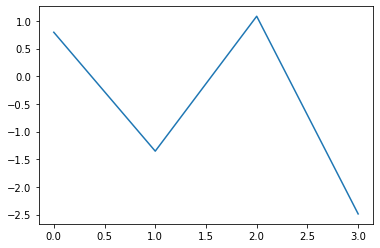

In [56]:
# Plot one of top outcomes
plt.plot(np.arange(4), tseries[1][0])

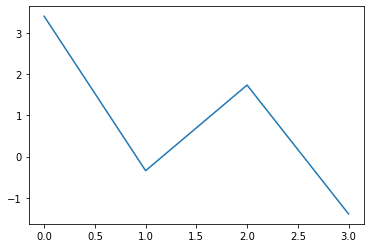

In [52]:
# Plot a second output
plt.plot(np.arange(4), tseries[67][0])

In [61]:
# Create function to evaluate potential trades
excluded = {}
return_list = []
def get_returns(r):
    if excluded.get(r['A']) is None:
        return_list.append(r['B Ret'])
        if r['B Ret'] < 0:
            excluded.update({r['A']:1})

winf.apply(get_returns, axis=1)

2696      None
2747      None
2851      None
4581      None
4727      None
          ... 
149655    None
149667    None
150473    None
154571    None
154573    None
Length: 839, dtype: object

In [62]:
get_stats(pd.Series(return_list))

Trades:  287 
Wins:  199 
Losses:  88 
Breakeven:  0 
Win/Loss Ratio:  2.261 
Mean Win:  0.478 
Mean Loss:  -0.593 
Mean:  0.15 
Std Dev:  0.667 
Max Win:  2.125 
Max Loss:  -2.206 
Sharpe Ratio:  3.5627
